In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Experiment 1: 

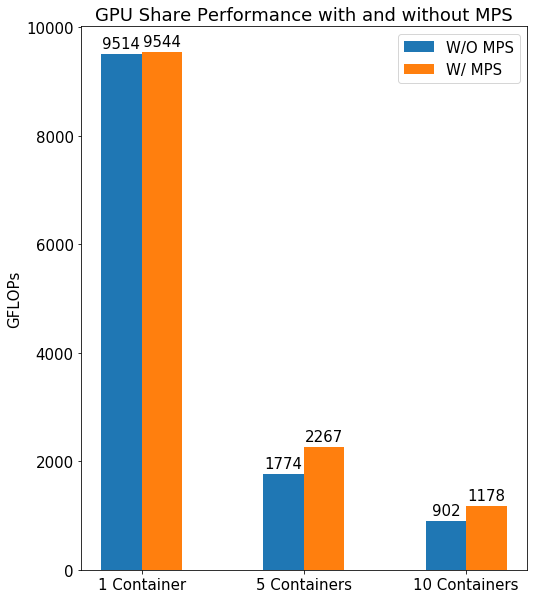

In [9]:
# bar plot 

plt.rcParams["font.size"] = "15"
labels = ['1 Container', '5 Containers', '10 Containers']
mps_means = [9544, 2267, 1178]
nomps_means = [9514, 1774, 902]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8,10))
fig.set

rects1 = ax.bar(x - width/2, nomps_means, width, label='W/O MPS')
rects2 = ax.bar(x + width/2, mps_means, width, label='W/ MPS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GFLOPs')
ax.set_title('GPU Share Performance with and without MPS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=15)
ax.autoscale_view()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)



plt.show()

# Task 5  27.89% 
# Task 10 30.59%

### Experiment 2: 

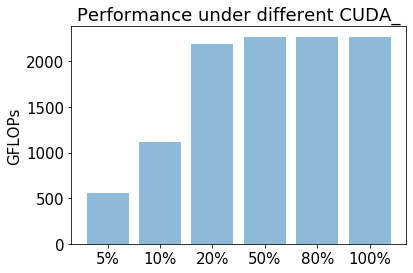

In [11]:
from statistics import mean 

raw_data = [
    [561.424, 562.109, 562.116,563.423,563.277],
    [1115.657, 1116.113, 1120.452, 1113.281, 1113.515],
    [2208.649, 2184.014, 2184.454, 2184.553, 2184.274],
    [2228.590, 2300.825, 2224.736, 2322.735, 2252.484],
    [2309.586, 2265.397, 2261.643, 2301.094, 2218.744],
    [2259.235, 2303.627, 2253.201, 2211.359, 2309.130]
]

averages = [mean(subarray) for subarray in raw_data]

labels = ['5%', '10%', '20%', '50%', '80%', '100%']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# rects1 = ax.bar(x - width/2, nomps_means, width, label='W/O MPS')
# rects2 = ax.bar(x + width/2, mps_means, width, label='W MPS')

plt.bar(x, averages, align='center', alpha=0.5)
plt.xticks(x, labels)
plt.ylabel('GFLOPs')
plt.title('Performance under different CUDA_')

plt.show()

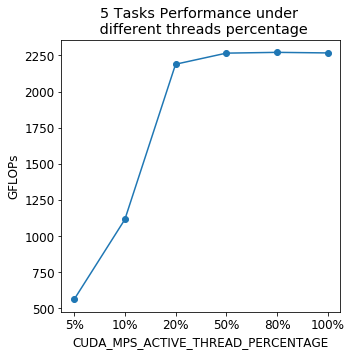

In [28]:
# Line plot
plt.rcParams["font.size"] = "12"

x_list = ['5%', '10%', '20%', '50%', '80%', '100%']
y_list = averages

plt.figure(figsize=(5,5))
# plt.figure('Line fig')
# ax = plt.gca()
# ax.set_xlabel('CUDA_')
# ax.set_ylabel('GFLOPs')

# ax.plot(x_list, y_list, color='b', linewidth=1, alpha=0.6)

plt.plot(x_list, y_list, marker='o')
plt.xlabel('CUDA_MPS_ACTIVE_THREAD_PERCENTAGE')
plt.ylabel('GFLOPs')
plt.title('5 Tasks Performance under \n different threads percentage')


plt.show()


In [ ]:
### Experiment 3: 

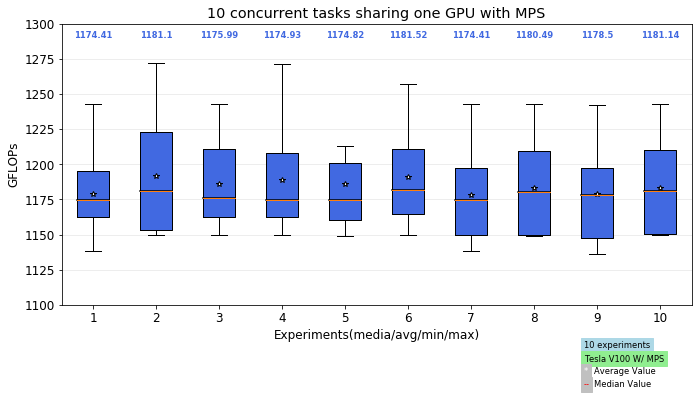

In [80]:
# boxplot
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot_color.html

from matplotlib.patches import Polygon
plt.rcParams["font.size"] = "12"

random_dists = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
                'Triangular(2,9,11)']
data = [
    [1162.205,1162.397,1139.097,1174.254,1175.631, 1174.566,1137.982,1202.010,1243.108,1214.942],
    [1226.605,1163.133,1215.157,1150.168,1271.996,1188.389,1150.340,1225.715,1173.816,1149.981],
    [1149.914,1243.154,1162.278,1213.827,1188.393,1163.586,1162.122,1214.712,1202.093,1161.795],
    [1174.286,1271.781,1187.727,1163.446,1175.565,1162.410,1227.913,1162.315,1149.859,1215.246],
    [1160.960,1160.577,1271.780,1213.204,1150.013,1201.833,1187.925,1149.171,1161.714,1199.196],
    [1240.405,1256.981,1173.234,1199.389,1149.362,1174.776,1214.991,1150.777,1161.456,1188.261],
    [1149.884,1200.699,1243.273,1214.929,1138.596,1149.582,1186.668,1175.493,1149.133,1173.329],
    [1149.904,1149.352,1198.889,1212.634,1148.979,1172.886,1149.590,1243.080,1188.089,1215.209],
    [1136.452,1196.986,1147.314,1186.196,1197.783,1241.950,1147.295,1213.614,1170.812,1147.462],
    [1214.999,1150.174,1188.195,1213.549,1200.016,1151.112,1149.678,1174.083,1242.948,1150.042]
]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('NBody Benchmark Results')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


bp = ax1.boxplot(data, notch=0, sym='', vert=1, whis=1.5)

plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('10 concurrent tasks sharing one GPU with MPS')
ax1.set_xlabel('Experiments(media/avg/min/max)')
ax1.set_ylabel('GFLOPs')


# Now fill the boxes with desired colors
box_color = 'royalblue'
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_color))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 1300
bottom = 1100
ax1.set_ylim(bottom, top)
# ax1.set_xticklabels(np.repeat(random_dists, 2),
#                     rotation=45, fontsize=8)


# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center',
             size='x-small',
             weight=weights[k],
             color=box_color)
    
    
# Finally, add a basic legend
fig.text(0.80, 0.15, '10 experiments', backgroundcolor='lightblue', color='black', weight='roman', size='x-small')
fig.text(0.80, 0.12, 'Tesla V100 W/ MPS', backgroundcolor='lightgreen', color='black', weight='roman', size='x-small')
fig.text(0.80, 0.09, '*', color='white', backgroundcolor='silver', weight='roman', size='x-small')
fig.text(0.815, 0.09, 'Average Value', color='black', weight='roman', size='x-small')
fig.text(0.80, 0.06, '--', color='red', backgroundcolor='silver', weight='roman', size='x-small')
fig.text(0.815, 0.06, 'Median Value', color='black', weight='roman', size='x-small')


plt.show()

In [ ]:
### We need performance comparision for real world use case. Like CV or NLP serving examples using GPU
